# Research Question And Hypothesis

Reaearch Question

* How does orbital inclination vary among satellites with different mean motion (orbit/day) clusters?

**Hypothesis**

*   Satellite clusters with higher mean motion (faster orbit speed) have significantly higher inlination distributions than slower satellites clusters.

**Null Hypothesis**

* The average inclination is the same across satellite clusters (no significant difference).



Significantly correlates

In [ ]:
#installing library and API

!pip install skyfield

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.0/367.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.7/235.7 kB 12.9 MB/s eta 0:00:00


There are 12981 total satellites in the "Active Satellites " dataset.





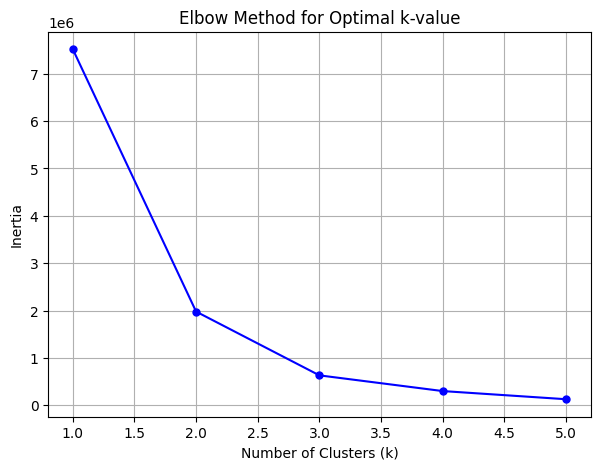

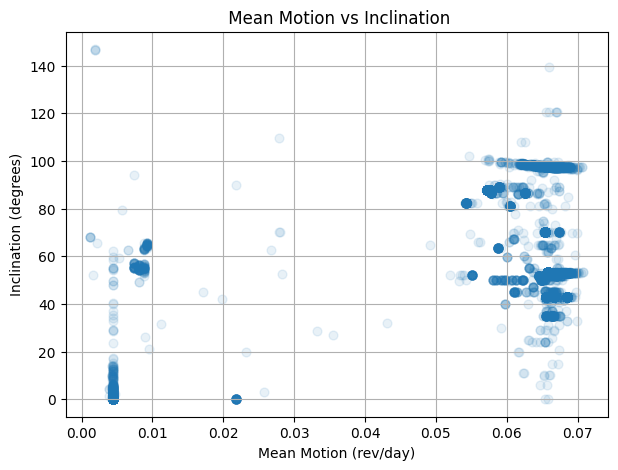

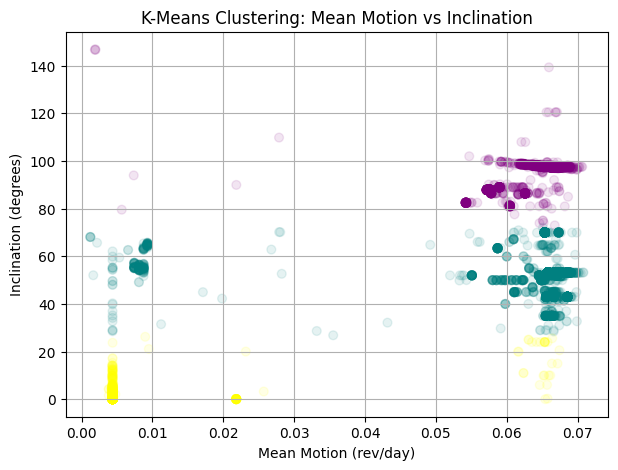

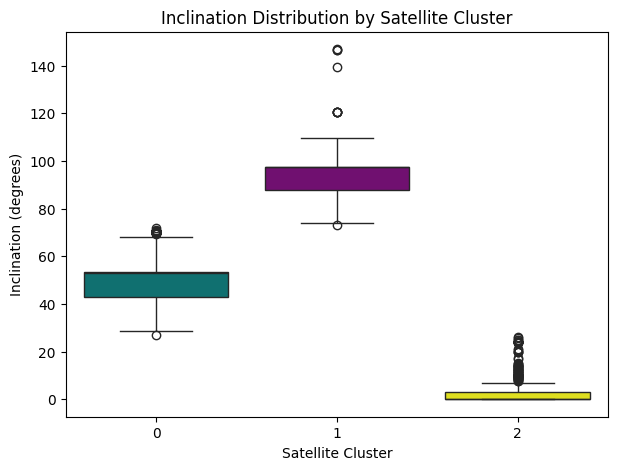



ANOVA Test Results:
F-statistic: 70787.49215280848
P-value: 0.0000000

Reject the Null Hypothesis (H₀)
→There is a significant difference in average inclination between clusters.


In [ ]:
#importing libraries and APIs
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from skyfield.api import EarthSatellite, load
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

#_______________________________________________________________________________

#get Active Satellite TLE data
url = "https://celestrak.org/NORAD/elements/gp.php?GROUP=active&FORMAT=tle"
tle_data = requests.get(url).text.strip().split("\n")    #raw TLE data as input

satellites = []
for i in range(0, len(tle_data), 3):
    if i + 2 < len(tle_data):
        name = tle_data[i].strip()
        line1 = tle_data[i+1].strip()
        line2 = tle_data[i+2].strip()
        satellites.append((name, line1, line2))  #raw TLE data split into name&
                                                #2 lines for further processing

#_______________________________________________________________________________

#convert TLE data into Skyfield Satellite Objects to interpret TLE data
ts = load.timescale()
sat_objects = []
for name, l1, l2 in satellites:
    sat = EarthSatellite(l1, l2, name, ts)
    sat_objects.append(sat)


#get required oribital data
sat_data = []
for sat in sat_objects:                #loops through Satellite Objects and
                                       #extracts necessary parameters
    orb = sat.model
    mean_motion = orb.no_kozai
    incl = np.degrees(orb.inclo)
    ecc = orb.ecco

    sat_data.append({
        "Name": sat.name,                 #satellite name
        "MeanMotion": mean_motion,        #mean motion of satellite in rev/day
        "Inclination": incl,              #inclination of satellite in degrees
        "Eccentricity": ecc,              #eccentricity of satellite (0, 1)
    })                                                          #floating range

df = pd.DataFrame(sat_data)

print('There are',df['Name'].count(),'total satellites in the "Active Satellites " dataset.')
print()
print()
print()
#_______________________________________________________________________________

#K-Means clustering

X = df[['MeanMotion', 'Inclination']]

#use the Elbow method to check the best number of clusters
inertias = []
K = range(1, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K, inertias, 'bo-', markersize=5)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k-value')
plt.grid(True)
plt.show()

#k=2 based off of elbow method graph
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

colors = ['teal','purple','yellow']

#visualize clusters

plt.figure(figsize=(7,5))
plt.scatter(df['MeanMotion'], df['Inclination'],
 s=40, alpha=0.1)
plt.xlabel('Mean Motion (rev/day)')
plt.ylabel('Inclination (degrees)')
plt.title(' Mean Motion vs Inclination')
plt.grid(True)
plt.show()


plt.figure(figsize=(7,5))
plt.scatter(df['MeanMotion'], df['Inclination'], c=[colors[i] for i in df['Cluster']],
 s=40, alpha=0.1)
plt.xlabel('Mean Motion (rev/day)')
plt.ylabel('Inclination (degrees)')
plt.title('K-Means Clustering: Mean Motion vs Inclination')
plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Cluster", y="Inclination", palette=colors)
plt.title("Inclination Distribution by Satellite Cluster")
plt.xlabel("Satellite Cluster")
plt.ylabel("Inclination (degrees)")
plt.show()

#_______________________________________________________________________________

#Hypothesis testing using ANOVA

#get inclination values for each cluster
cluster_groups = [group['Inclination'].values for _, group in
                  df.groupby('Cluster')]

#one-way ANOVA
f_stat, p_value = f_oneway(*cluster_groups)

print()
print()
print("ANOVA Test Results:")
print(f"F-statistic: {f_stat:}")
print(f"P-value: {p_value:.7f}")

#Interpretation
alpha = 0.05  # significance level

if p_value < alpha:
    print("\nReject the Null Hypothesis (H₀)")
    print("→There is enough evidence to suggest a significant difference in average inclination between clusters.")
else:
    print("\nFail to Reject the Null Hypothesis (H₀)")
    print("→There is enough evidence to suggest no significant difference in average inclination between clusters.")


RQ₄: Do satellites in circular orbits have different orbital speeds (mean motion) compared to satellites in more eccentric orbits?

🔹 Hypotheses

Null Hypothesis (H₀): Circular orbits have no correlation on mean motion of satellites.

Alternative Hypothesis (Hₐ): Circular orbits have a positve effect on mean motion compared to eccentric orbits.


There are 12981 total satellites in the "Active Satellites " dataset.

Number of circular orbit satellites: 12827
Number of eccentric orbit satellites: 154



One-sided T-Test Results+
T-statistic: 11.438882
P-value (one-sided): 0.000000

Reject the Null Hypothesis
→ Circular orbit satellites have significantly higher mean motion than eccentric satellites.


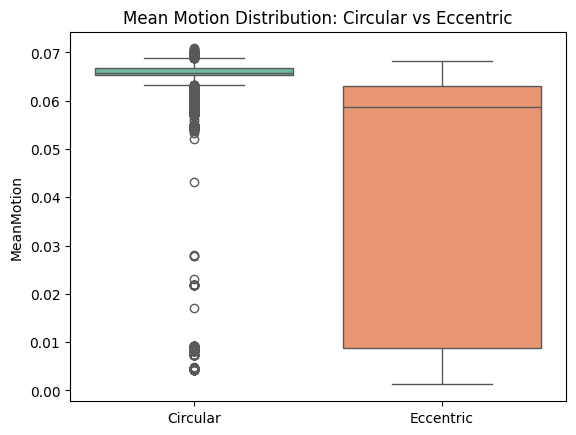

In [ ]:
#importing libraries and APIs
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from skyfield.api import EarthSatellite, load
from sklearn.preprocessing import StandardScaler

#_______________________________________________________________________________

#get Active Satellite TLE data
url = "https://celestrak.org/NORAD/elements/gp.php?GROUP=active&FORMAT=tle"
tle_data = requests.get(url).text.strip().split("\n")    #raw TLE data as input

satellites = []
for i in range(0, len(tle_data), 3):
    if i + 2 < len(tle_data):
        name = tle_data[i].strip()
        line1 = tle_data[i+1].strip()
        line2 = tle_data[i+2].strip()
        satellites.append((name, line1, line2))  #raw TLE data split into name&
                                                #2 lines for further processing

#_______________________________________________________________________________

#convert TLE data into Skyfield Satellite Objects to interpret TLE data
ts = load.timescale()
sat_objects = []
for name, l1, l2 in satellites:
    sat = EarthSatellite(l1, l2, name, ts)
    sat_objects.append(sat)


#get required oribital data
sat_data = []
for sat in sat_objects:                #loops through Satellite Objects and
                                       #extracts necessary parameters
    orb = sat.model
    mean_motion = orb.no_kozai
    incl = np.degrees(orb.inclo)
    ecc = orb.ecco

    sat_data.append({
        "Name": sat.name,                 #satellite name
        "MeanMotion": mean_motion,        #mean motion of satellite in rev/day
        "Inclination": incl,              #inclination of satellite in degrees
        "Eccentricity": ecc,              #eccentricity of satellite (0, 1)
    })                                                          #floating range

df = pd.DataFrame(sat_data)

print('There are',df['Name'].count(),'total satellites in the "Active Satellites " dataset.')
print()

#Split into Circular vs Eccentric Groups
circular = df[df['Eccentricity'] < 0.01]['MeanMotion']
eccentric = df[df['Eccentricity'] >= 0.01]['MeanMotion']

print(f"Number of circular orbit satellites: {len(circular)}")
print(f"Number of eccentric orbit satellites: {len(eccentric)}\n")
print()
print()
#_______________________________________________________________________________

#One-sided t-test:
t_stat, p_value_two_sided = ttest_ind(circular, eccentric, equal_var=False)
                                                                #Welch's t-test

#Convert Two-sided to one-sided p-value
if t_stat > 0:
    p_value_one_sided = p_value_two_sided / 2
else:
    p_value_one_sided = 1 - p_value_two_sided / 2

print("One-sided T-Test Results+")
print(f"T-statistic: {t_stat:.6f}")
print(f"P-value (one-sided): {p_value_one_sided:.6f}")

#Interpretation

alpha = 0.05 #Significance Level
if p_value_one_sided < alpha:
    print("\nReject the Null Hypothesis")
    print("→ There is enough evidence to suggest that Circular orbit satellites have significantly higher mean motion than eccentric satellites.")
else:
    print("\nFail to Reject the Null Hypothesis")
    print("→ No significant evidence that circular orbits have higher mean motion than eccentric orbits.")


#Visualising

sns.boxplot(data=df, x=np.where(df['Eccentricity']<0.01,'Circular','Eccentric'),
            y='MeanMotion', palette='Set2')
plt.title("Mean Motion Distribution: Circular vs Eccentric")
plt.show()